In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('student_scores.csv')
data.head()  # check top 5 rows  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.shape  # view the shape i.e. number of rows, columns

(25, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


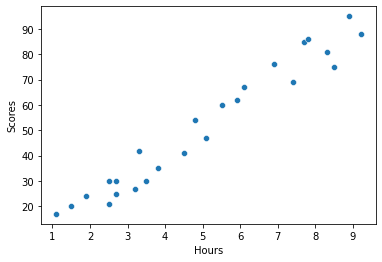

In [13]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);   # plot the data

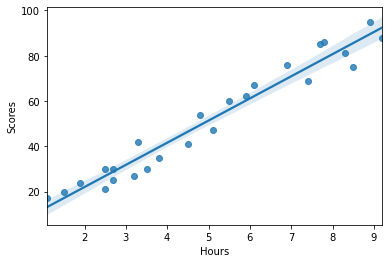

In [14]:
sns.regplot(x=data['Hours'], y=data['Scores']);  # regression plot gives a better and clear visualization for such data

In [19]:
X = data[['Hours']]
y = data['Scores']
X
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [22]:
regressor.fit(train_X, train_y)   ## train the model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [23]:
pred_y = regressor.predict(val_X) ## prediction

In [24]:
pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})  ## view actual and predicted on test set side-by-side

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


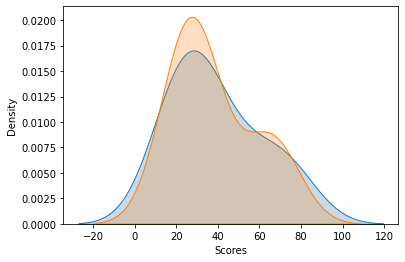

In [25]:
## Actual vs Predicted distribution plot 

sns.kdeplot(pred_y,label="Predicted", shade=True);

sns.kdeplot(data=val_y, label="Actual", shade=True);

In [26]:
print('Train accuracy: ', regressor.score(train_X, train_y),'\nTest accuracy : ', regressor.score(val_X, val_y) )


Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


In [27]:
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  93.89272889341655
